# Sentiment Analysis Using Bert

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

# Instantiate the Model

In [2]:
tokanizer=AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model=AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Encode and Calculate Sentiment

In [11]:
tokens=tokanizer.encode("I don't like this at all.",return_tensors='pt')
tokens

tensor([[  101,   151, 11530,   112,   162, 11531, 10372, 10160, 10367,   119,
           102]])

In [12]:
tokanizer.decode(tokens[0])

"[CLS] i don't like this at all. [SEP]"

In [13]:
result=model(tokens)

In [15]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1069,  2.4825,  0.7038, -2.2700, -3.2042]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [16]:
result.logits

tensor([[ 3.1069,  2.4825,  0.7038, -2.2700, -3.2042]],
       grad_fn=<AddmmBackward0>)

* The higher the number the positive the sentiment

In [18]:
#To get a score between 1 & 5
int(torch.argmax(result.logits))+1

1

* Number is less, hence negatice sentiment

In [20]:
token2=tokanizer.encode("This was amazing, we should do this again",return_tensors='pt')
token2

tensor([[  101, 10372, 10140, 39854,   117, 11312, 14693, 10154, 10372, 12590,
           102]])

In [21]:
res=model(token2)

In [22]:
int(torch.argmax(res.logits))+1

5

* Number is high, hence positive sentiment

In [23]:
token3=tokanizer.encode("The sky is blue on a clear day.",return_tensors='pt')
res3=model(token3)
int(torch.argmax(res3.logits))+1

4

# Collect Reviews from IMDB 

## Getting text from webpage

In [28]:
r=requests.get('https://www.imdb.com/title/tt12361974/reviews')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*text show-more__control.*')
results = soup.find_all('div', {'class':regex})
reviews = [result.text for result in results]

In [34]:
reviews

['As a life long comic fan, DC characters are more close to my heart than Marvel characters. The first making of this film was just disappointing. It seems like there are bunch of idiots sitting on the WB executive positions who have no vision at all. The first film was literally incomplete. This one tells the full story and I must say nicely. This is the movie we, all the fans wanted and deserve.',
 "I don't want to discuss the Machiavellian machinations that led to the butchery cut from 2017 and then to this one seeing the light of day - suffice to say that I am not hopeful for the future - yet I am grateful for them leading to me getting to see Zack Snyder's cut. Other than being way too long, it was a pretty perfect film. It would have been a much better business decision to split it into two films and getting twice the money from cinemas than to cut and reshoot it into stupidity.After watching this cut I knew why things happened, what the motivations of the characters were, includ

# Load reviews in a DataFrame and Score

In [35]:
import pandas as pd
import numpy as np

In [37]:
df=pd.DataFrame(np.array(reviews),columns=["Review"])
df

,Review
0,"As a life long comic fan, DC characters are mo..."
1,I don't want to discuss the Machiavellian mach...
2,Zach Snyder's original version is 1000 x's bet...
3,"Yesss, thank you Zack Snyder!\nTHIS is the mov..."
4,No words can describe the experience. Seeing a...
5,Zack Snyder delivers by far his best film with...
6,"The longer they are, the more time they get to..."
7,This movie is significantly higher quality. Al...
8,Zack snyder's justice league is far better tha...
9,"It was a fan service, period. Good on Snyder f..."


In [42]:
df.shape

(25, 1)

In [40]:
def sentiment_score(review):
    tokens = tokanizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [43]:
sentiment_score(df["Review"].iloc[1])

4

In [79]:
rev={}
for i in range(0,25):
    try:
        rev[i]=sentiment_score(df["Review"].iloc[i][:512])
    except RuntimeError:
        print(f'Broke for id {i}')

In [80]:
rev

{0: 5,
 1: 4,
 2: 4,
 3: 5,
 4: 5,
 5: 5,
 6: 5,
 7: 3,
 8: 4,
 9: 4,
 10: 2,
 11: 3,
 12: 2,
 13: 5,
 14: 5,
 15: 5,
 16: 5,
 17: 2,
 18: 5,
 19: 3,
 20: 5,
 21: 3,
 22: 2,
 23: 5,
 24: 5}

In [81]:
df["Scores"]=rev
df

,Review,Scores
0,"As a life long comic fan, DC characters are mo...",5
1,I don't want to discuss the Machiavellian mach...,4
2,Zach Snyder's original version is 1000 x's bet...,4
3,"Yesss, thank you Zack Snyder!\nTHIS is the mov...",5
4,No words can describe the experience. Seeing a...,5
5,Zack Snyder delivers by far his best film with...,5
6,"The longer they are, the more time they get to...",5
7,This movie is significantly higher quality. Al...,3
8,Zack snyder's justice league is far better tha...,4
9,"It was a fan service, period. Good on Snyder f...",4


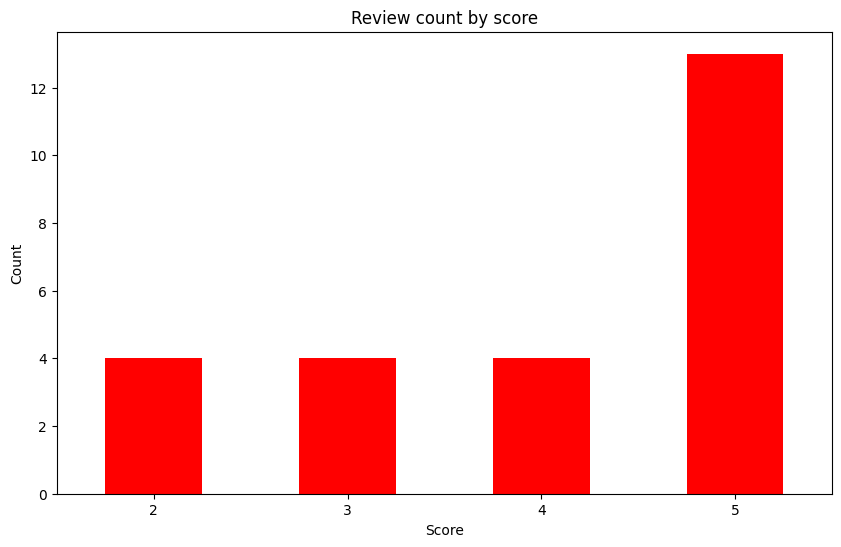

In [82]:
import matplotlib.pyplot as plt
df["Scores"].value_counts().sort_index().plot(kind="bar",
                              title="Review count by score",
                              figsize=(10,6),
                              xlabel="Score",
                              ylabel="Count",
                              color="Red")
plt.xticks(rotation=0)
plt.show()